# Necessity Category Inflation📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

I would like to focus on rising prices for necessities of the modern american, those being things such as groceries, gas, housing, since the end of the great recession. The great recession lasted until 2009, so I am hoping to scope data from 2010 to 2024. I would like to identify which of these 3 has seen the most inflation in price by percentage. This problem is important as many people believe we are going into another recession currently, which is indicated generally by ballooning of prices finally popping and rapid dropping, for instance in the great recession, the cause which is usually pointed out is the housing market pop, which had massively over inflated prices then. I personally find it important as well, as I am very interested in the economy of the United States and am interested to see how these prices compare to eachother.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Which necessity category has the highest inflation between groceries, gas, and housing since the great recession? 
Which necessity category has the lowest inflation? 
What time period saw the most inflation for each category?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

I hypothesize that the answer would be housing has the most inflation percentage accross the three neccessity categories, gas to have the least, and when it comes to time period I would think 2020-2024 for all of them would be the highest due to bad economic policies.

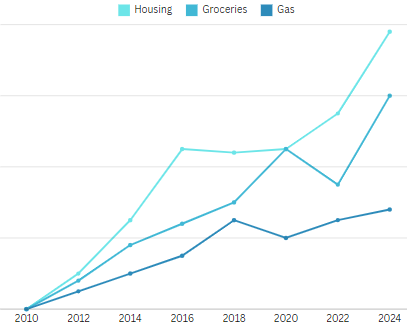

I would think an answer could look like this, some sort of graph which shows the clear answer of which of the 3 has inflated the most and least by percentage. As well as showing over which time periods we saw the greatest inflation by percent.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

1.(file) gasPrices.csv - source: U.S. Energy Information Administration - link: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m - This data covers my time period and has the needed information

2.(file) CPIgrocery.csv - source: Kaggle - link: https://www.kaggle.com/datasets/csafrit2/food-prices-in-us-cities?resource=download - This data covers up to 2022 and is the best data set I could find for free which had the data I needed

3.(api) US_Housing_Data_2010_to_Present.csv - source: FRED (Federal Reserve Bank of Saint Louis Economic Data) - link: https://fred.stlouisfed.org/series/USSTHPI - This api has been giving me issues on getting connected, I have reached out to connect@data.nasdaq.com as the error below suggests. This api I have chosen is referenced by many data visualizations I have seen when talking about the housing price index, and it has data which spans my entire time period I have chosen.

In [10]:
#code for API

import nasdaqdatalink
import pandas as pd
import os
from dotenv import load_dotenv

# Set the API key
nasdaqdatalink.ApiConfig.api_key = os.getenv("nasdaqKey") 

# Fetch the U.S. housing data from 2010 to present
UShousingAPI = nasdaqdatalink.get('FRED/USSTHPI', start_date='2010-01-01', paginate=True)

# Convert the data to a DataFrame
df_HousingData = pd.DataFrame(UShousingAPI)

df_HousingData.head()

DataLinkError: (Status 410) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import nasdaqdatalink
import os
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Due to ongoing issues with the API I am going to be downloading the data into a CSV to use until support figures it out

In [2]:
df_housing = pd.read_csv('dataSources/USSTHPI_API_DATA.csv')
df_gas = pd.read_csv('dataSources/gasPrices.csv')
df_grocery = pd.read_csv('dataSources/CPIgrocery.csv')


# 1. Exploratory Data Analysis (EDA)

In the start I will check for missing values, duplicate values, correct datatypes, and basic statistics.

In [7]:
dfs = [df_housing, df_gas, df_grocery]
df_names = ['df_housing', 'df_gas', 'df_grocery']

for i, df in enumerate(dfs):
    print(f"Exploratory Data Analysis for {df_names[i]}\n")
    
    #Shape and Data Types
    print("Shape of the DataFrame:", df.shape)
    print("Data Types:\n", df.dtypes, "\n")
    
    #Check for Missing Values
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values[missing_values > 0], "\n")
    
    #Basic Statistics
    print("Summary Statistics:\n", df.describe(), "\n")
    
    #Check for Duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of Duplicates: {duplicates}\n")
    
    print("="*50)


Exploratory Data Analysis for df_housing

Shape of the DataFrame: (58, 2)
Data Types:
 DATE        object
USSTHPI    float64
dtype: object 

Missing Values:
 Series([], dtype: int64) 

Summary Statistics:
           USSTHPI
count   58.000000
mean   425.527069
std    114.812740
min    308.580000
25%    326.992500
50%    389.780000
75%    469.837500
max    682.180000 

Number of Duplicates: 0

Exploratory Data Analysis for df_gas

Shape of the DataFrame: (177, 2)
Data Types:
 Date                                                                             object
U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)    float64
dtype: object 

Missing Values:
 Series([], dtype: int64) 

Summary Statistics:
        U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
count                                         177.000000                           
mean                                            3.091096                           
std         

As Shown in the above there a no missing values or duplicate values throughout any of the data. All data types also look correct.

### insights based off of df_housing:

    Based off of the difference between the min to the q1 and q2 numbers versus q3 and the max it seems as time has gone on the numbers have started to rise faster, this is not a good sign as it may mean these homes are being over valued.

    The min is closer to the mean than the max meaning there are more smaller values than greater values, this can also be a sign of the price index rising faster as time goes on. This may be so much so that the graph may almost be exponential.

### insghts based off of df_gas:

    Based off of the difference between the min to the q1 and q2 numbers versus q3 and the max it seems as time has gone on the numbers have started to rise only slightly faster. 

    The mean is slightly higher than the q2 number which would mean the price of gas may have more higher values than lower values, this is a good sign that the growth may not be exponential, like seen with housing. Though we can only speculate until it is graphed.

### insights based off of df_grocery:

    The mean being almost as high as the q3 value indicates the values above the q3 grow much faster in price. This indicates grocery prices increasing quite quickly.

    The relative slow growth aside from between q3 and the max indicates a slow increase of price up to q3, likely following inflation. This would indicate the graph may slowly incease until after the q3 value where it will shoot up.


## Visualization Section

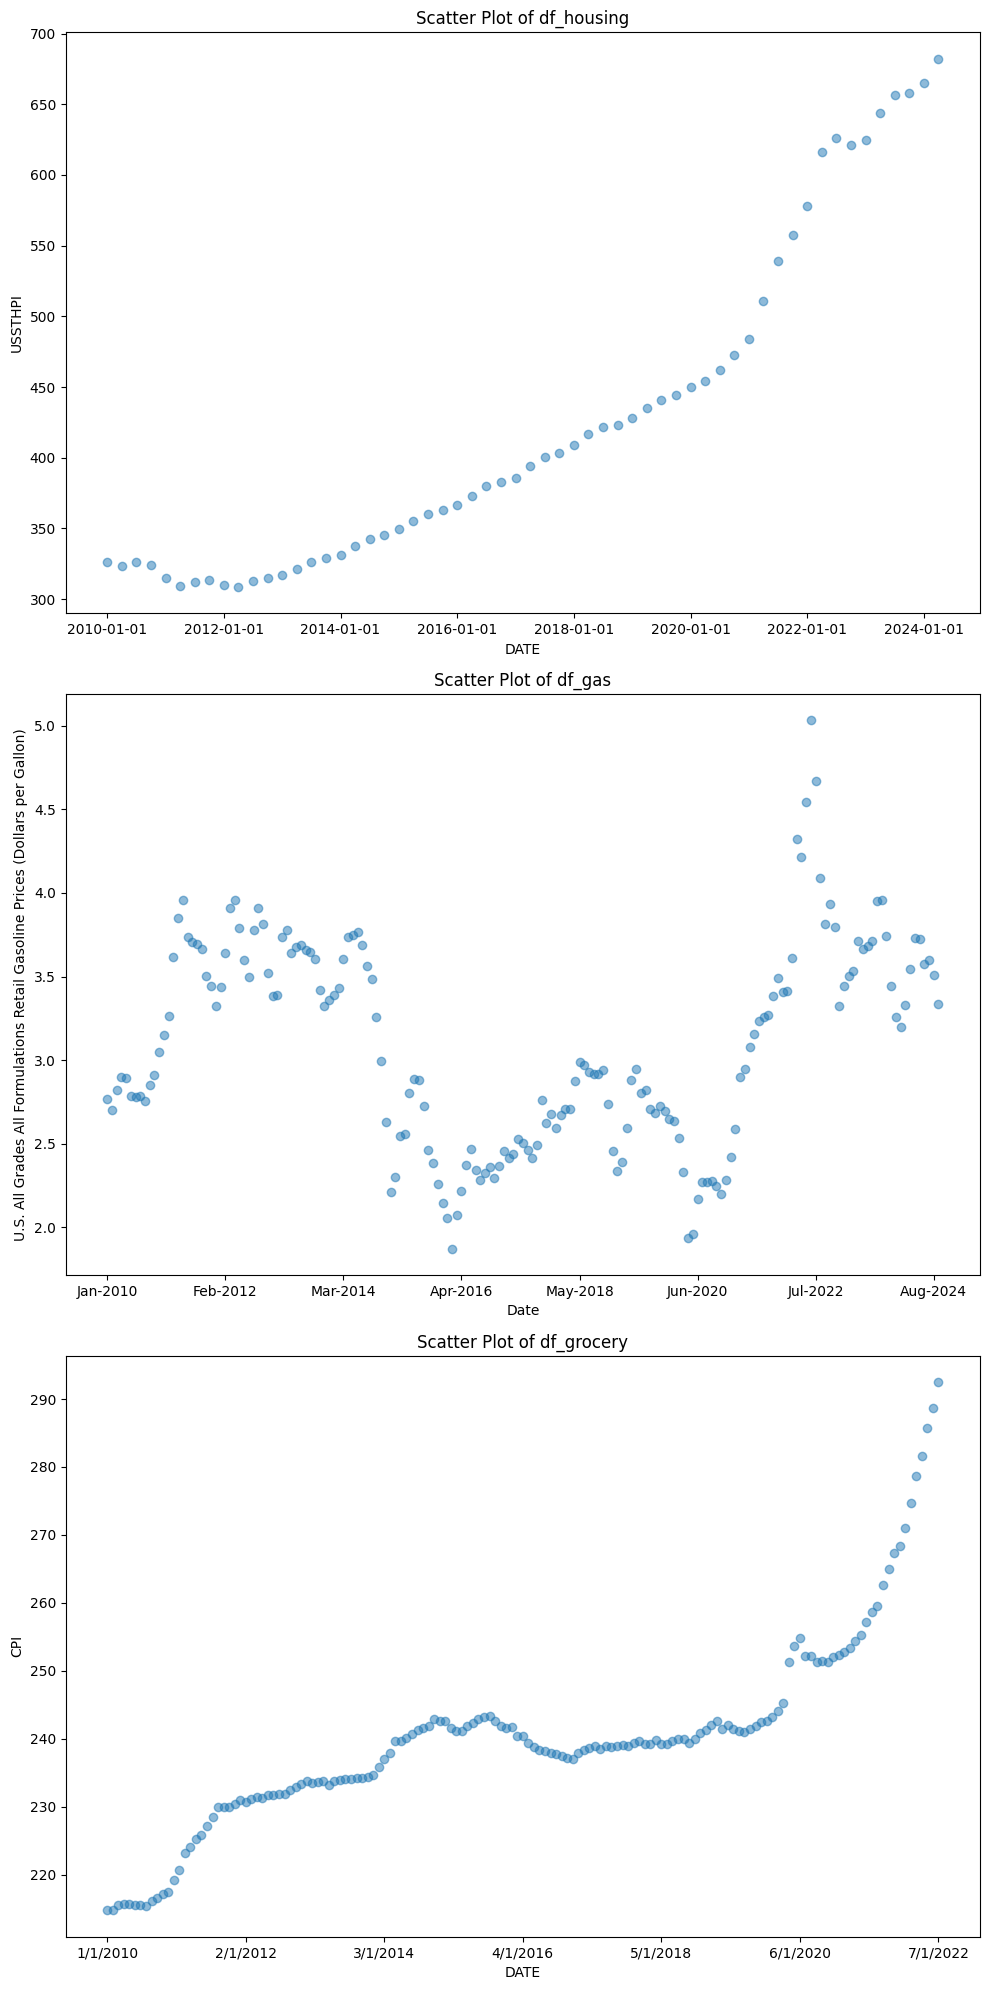

In [15]:
x_columns = ['DATE', 'Date', 'DATE']
y_columns = ['USSTHPI', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'CPI']


fig, axes = plt.subplots(3, 1, figsize=(10, 20))

for i, df in enumerate(dfs):
    axes[i].scatter(df[x_columns[i]], df[y_columns[i]], alpha=0.5)
    axes[i].set_title(f'Scatter Plot of {df_names[i]}')
    axes[i].set_xlabel(x_columns[i])
    axes[i].set_ylabel(y_columns[i])
    axes[i].xaxis.set_major_locator(MaxNLocator(nbins=8))

plt.tight_layout()
plt.show()

Based off of these graphical representation I will make some new insights.

### insights based off of df_housing:

    As shown in the scatter plot, there are no real outliers within this data as it all follows the clear trend of the data. Therefore no data cleaning is currently necessary.

    The graph does start small, and is actually decreasign at the start, this may indicate that the housing market was still recovering from the 2008 crash until it began to grow again in 2012. 

    The graph begins to exponentially begin to grow around 2021, this may indicate that the problem which led to the over evaluation of the housing market began at the end of the pandemic.

    Overall this graph heavily indicates a rapid increase in the price of homes which followed a normal rate until 2021 when it began to increase much faster. Then during late 2022 to 2023 there is a slight dip, this could be up to a number of factors, but I would speculate this may be an indication of a fall later to come, as shortly after the data continues on its previous high growth trajectory.

### insghts based off of df_gas:

    The scatter plot for df_gas reveals possible outliers around July of 2022. I think these are relevent to my analysis as this data is not anomylous and actually makes sense. As around that time was when the world was reacting to Russia's recent invasion of Ukraine. This led to a lot of restructuring of imports and exports for the U.S. As gasoline is an import for the United States, we would expect to see a change in price at this time as there was speculation of the import of gas becoming more costly, prompting gas stations to raise prices in advance.

    A drop in prices can be seen from 2014 to 2021 with extreme lows in 2016 and 2020. This is due to trade with OPEC or Organization of the Petroleum Exporting Countries being significantly cheaper during this era. The gas prices then begin to rise again after the pandemic ends towards 2021.

    The exteme lows displayed are interesting. 2016's may be due to the year being an election year, and as is common in election years, the current party in power may push for policies that help in the short term in order to gain the support of the people. The 2020 low is easy to explain, as the pandemic kept people home, gas prices plummited as the demand itself for gas also plummited due to these environmental factor. Another part may be 2020 was again an election year prompting for similar short term legislation being passed to attempt to gain voters.

    Overall this visualization indicates the frequent change of gas prices, as these prices fluctuate at a higher rate than either of the two other visualizations. Going into 2024 we have seen gas prices continue to be lower, though this is again an election year. Though this graph does indicate that gas prices may not have been as affected by inflation from 2010 to present, at least compared to the other two essential fields. 

### insights based off of df_grocery:

    The scatter plot for df_grocery has no visible outliers, although there is an anomylous change in 2020, though this is easily explainable as once again the pandemic. Which slightly spiked price growth before it dropper back down due to fear of grocery goods becoming scarce in the wake of the restrictions on imports.

    From 2014 to 2017 there is a noticable high portion which is not beaten until the pandemic which is also where the rapid increase in prices begin. I am not sure as to the cause of this local maximum, but I do believe this is still important to point out.

    The extremely exponential growth in prices that start after the pandemic heavily display the inflation which is unheard of when it comes to the grocery prices up to this point. The growth begins in late 2020, and does not stop until this data is no longer recorded.

    Overall, this visualization left me with surpising thoughts about the inflation in this necessity category. It is clear this inflation level is much higher than seen in gas, but may still not contend with housing's inflationary rise.

## Percentage Change Visualizations

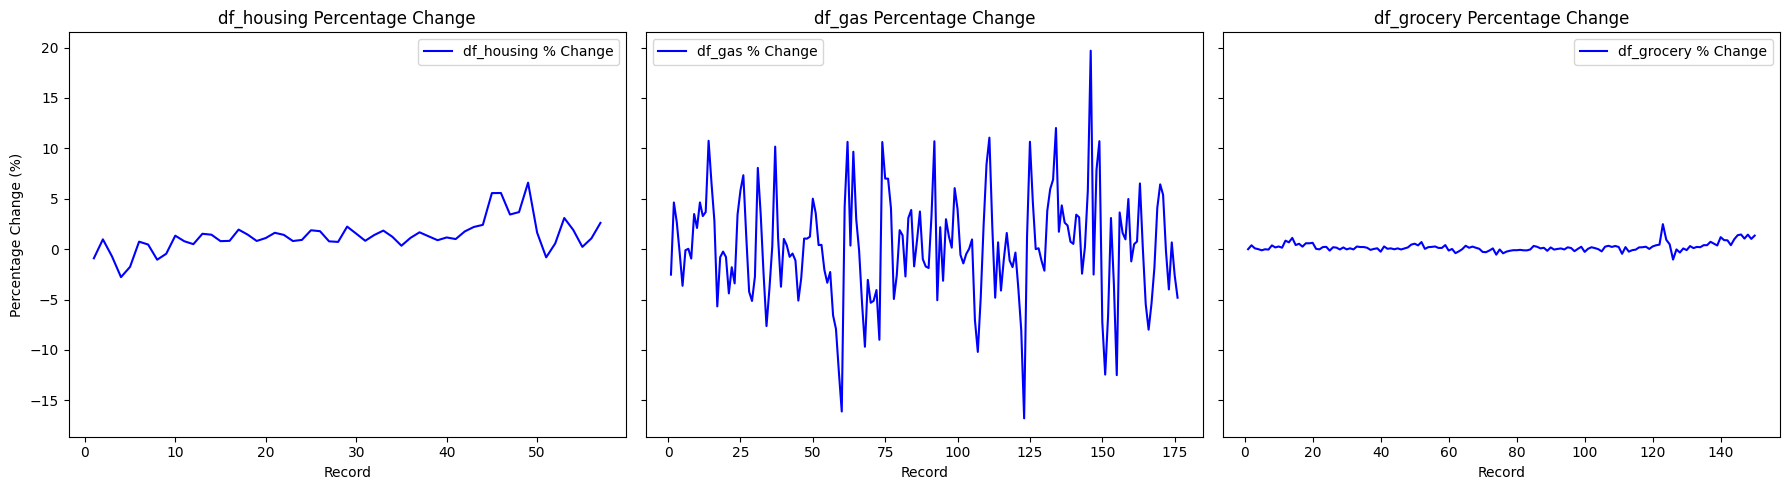

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  

for i, df in enumerate(dfs):
    pct_change = df[y_columns[i]].pct_change() * 100 
    
    axes[i].plot(pct_change, label=f'{df_names[i]} % Change', color='b')
    axes[i].set_title(f'{df_names[i]} Percentage Change')
    axes[i].set_xlabel('Record')
    axes[i].set_ylabel('Percentage Change (%)' if i == 0 else "") 
    axes[i].legend()

plt.tight_layout()
plt.show()

The above 3 visualizations display the percentage change from each record to the next. These visualizations side by side display the rapid change which is seen in the gas price index when compared to the slower chnage of the housing market and the especially slow change in the grocery market. We can also see the percentage change which the pandemic caused being so extreme around where the records would line up with 2020, accurately indicating anonmylous change there is consistent accross all 3 necessity Categories.

# 2. Data Cleaning and Transformation

I do not have any missing values or outlier to make adjustments for, as determined in the above exploratory data analysis. 

I did do some cleaning of values prior to beginning this project which I feel are best mentioned here. I eliminated all values outside of the data range which is outlind in this projects scope (2010 - current). This cleaning was done within excel for the gas and grocery datasets. The housing cleaning was done by pulling records through the API from only 2010 on.

The reason I chose to do the above cleaning is that I wanted to accomplish staying in the scope of the project which I had layed out.

# 3. Prior Feedback and Updates

The Feedback I was given from checkpoint one is as follows:

**"Overall, you did a really good job establishing the datasets and the scope of your project. However, I also had trouble with the coding aspect for this and kept getting errors so I understand why establishing the Api was difficult"**

In response to this feedback, I was happy to see my scope seemd good and the datasets were properly explained. For the topic of API troubles, I used a work around of pulling from my desired api to a csv file and then putting into the project rather than trying to get it to work as the difficulty is clearly shared amongst other students. This work around also allows for easy switch to pulling from the API once the Nasdaq team gets it fixed as the data is put into a dataframe which I can late replace its contents with the working API code. Until the Nasdaq team is able to resolve the issue, this is my workaround. That is all the changes I made based off of the feedback I recieved.



# 4. Machine Learning Plan

### 1. Type of Machine Learning Model:

I plan to use a Long Short-Term Memory (LSTM) neural network for time-series forecasting for my Machine Learning.

**Objective:**
My objective is to predict future values of CPI for groceries, gas prices, and housing price indices using the historical data which I already have.

**Why LSTM?**
LSTMs are perfect for time-series data, this is because they can capture long-term dependencies, trends, and temporal relationships that are challenging for traditional models. I decided on these after doing research into what models best suit data such as mine, as well as, with the goal in mind of predicting future values.

**Further EDA?**
I believe the data is already in a place from my orignal EDA, and does not need anymore before being ready for the implementation of Machine Learning.

**Challenges and How to Address Them:**
1. One challenge I forsee within my plan, is the use of a model I am not 100% familiar with. To combat this unfamiliarity I plan to do research to better understand its use, and to play around with it myself to get a feel for how it works.

2. Another issue may come to how small the datasets are, luckily LSTM has hyperparameters which can be finely tuned to prevent overfitting or underfitting of the data. This will ensure that the LSTM has no issues with the datasets which have less entries.

# 5. Machine Learning Implementation Process

**Per Checkpoint 3's instructions _"You're not expected to actually implement machine learning in this checkpoint"_ therefore I will just be planning out my process.

#### 1. EDA
As mentioned previously, no further EDA will need to be done.

#### 2. Splitting the dataset into training and test sets
As mentioned previously, I will be splitting the data sets via a ratio of 80:20, where 80% will be used for training and 20% for testing. This ratio is optimal as it ensure there is enough training data to ensure accuracy of the model, as well as, ensuring enough testing data is available to verify the accuracy of the model.

#### 3. Data cleaning process using sci-kit learn pipeline
I will use the basics from what was learned in the regression lab, as well as, external research to ensure accurate **data imputation**. If I determine **Data Scaling and Normalization** are needed I will aim to follow the regression lab and if I run into errors will seek external help. Luckily, I will not have to worry about **Handling of Categorical Data** as my data is not categorical.

#### 4. Testing multiple algorithms and models
From my research I only plan to use the LSTM process which I layed out previously. I will be using it for all three datasets and will test using different parameters to ensure success, therefore the ratio's previously listed may change in this section due to testing. As of right now though, the process above will be my plan going forward.

#### 5. Evaluating the different models and choosing one
As started in the previous paragraph, I will be evaluating the models I create using various parameters, and thus choosing a model which best suits my needs using the optimal parameters. I plan to do this based on the accuracy of the prediction with the test data, the model with the best accuracy will be selected and the final model will use the same parameters that the optimal model has.

# 6. Prior Feedback and Updates 2

No feedback was given for checkpoint 2, though I did recieve full marks on all parts of the rubric which were in the instructions

# 7. Machine Learning In Use

1. Grocery CPI

In [4]:
df = pd.read_csv('dataSources/CPIgrocery.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE')
scaler = MinMaxScaler()
df['CPI_scaled'] = scaler.fit_transform(df[['CPI']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12 
data = df['CPI_scaled'].values
X, y = create_sequences(data, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([LSTM(50, activation='relu', input_shape=(seq_length, 1)),Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)


c:\Users\mason\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0886 - val_loss: 0.3557
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0648 - val_loss: 0.2902
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0468 - val_loss: 0.2284
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0317 - val_loss: 0.1723
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0178 - val_loss: 0.1204
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - val_loss: 0.0732
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0019 - val_loss: 0.0363
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 0.0193
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0031 - val_loss: 0.0205
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0020 - val_loss: 0.0312
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.2602e-04 - val_loss: 0.0441
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.3144e-04 - val_loss:

Graphing of Model for Evaluation

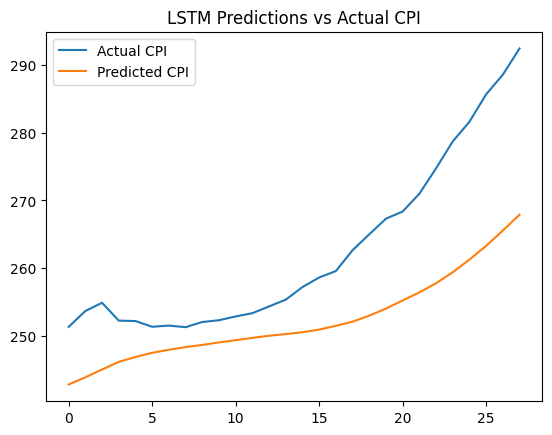

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['CPI'][-len(predictions):].values, label='Actual CPI')
plt.plot(predictions_rescaled, label='Predicted CPI')
plt.legend()
plt.title('LSTM Predictions vs Actual CPI')
plt.show()

While not 100% accurate this model did accuately follow the curves structure. This could be due to small sample size, but overall I am not unhappy with the outcome as machine learning is still a topic which I only have the basic knowledge of from this class.

2. Using the above as a layout going forward, I will no use the LTSM set up on the gasPrices data.

Epoch 1/50


c:\Users\mason\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.1741 - val_loss: 0.3506
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1302 - val_loss: 0.2601
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0862 - val_loss: 0.1828
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0581 - val_loss: 0.1164
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0365 - val_loss: 0.0620
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0176 - val_loss: 0.0273
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - val_loss: 0.0198
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - val_loss: 0.0204
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0104 - val_loss: 0.0279
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115 - val_loss: 0.0335
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - val_loss: 0.0266
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - val_loss: 0.0208
Epoch 13/50


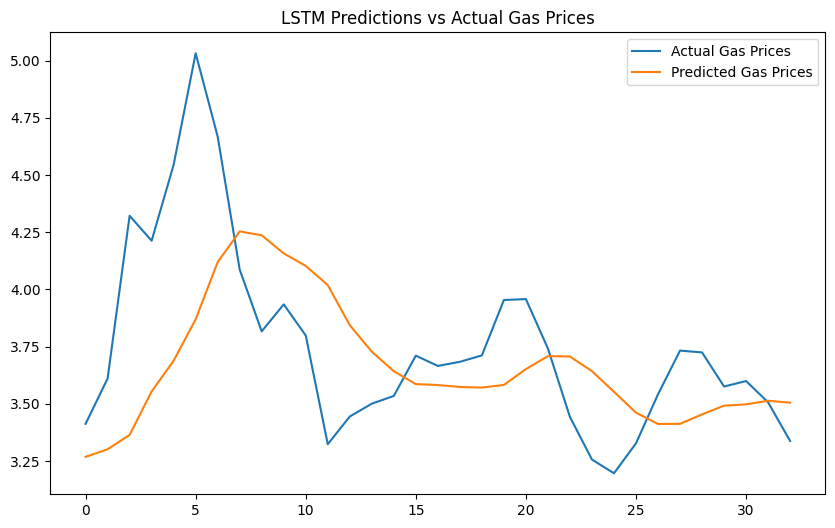

In [7]:
df_gas = pd.read_csv('dataSources/gasPrices.csv')
df_gas['Date'] = pd.to_datetime(df_gas['Date'], format='%b-%Y')
df_gas = df_gas.sort_values('Date')

scaler_gas = MinMaxScaler()
df_gas['Price_scaled'] = scaler_gas.fit_transform(df_gas[['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12 
data_gas = df_gas['Price_scaled'].values
X_gas, y_gas = create_sequences(data_gas, seq_length)
train_size_gas = int(len(X_gas) * 0.8)
X_train_gas, X_test_gas = X_gas[:train_size_gas], X_gas[train_size_gas:]
y_train_gas, y_test_gas = y_gas[:train_size_gas], y_gas[train_size_gas:]
X_train_gas = X_train_gas.reshape((X_train_gas.shape[0], X_train_gas.shape[1], 1))
X_test_gas = X_test_gas.reshape((X_test_gas.shape[0], X_test_gas.shape[1], 1))

model_gas = Sequential([LSTM(50, activation='relu', input_shape=(seq_length, 1)), Dense(1)])
model_gas.compile(optimizer='adam', loss='mse')
model_gas.fit(X_train_gas, y_train_gas, epochs=50, batch_size=32, validation_data=(X_test_gas, y_test_gas))

predictions_gas = model_gas.predict(X_test_gas)
predictions_rescaled_gas = scaler_gas.inverse_transform(predictions_gas.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(df_gas['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'][-len(predictions_gas):].values, label='Actual Gas Prices')
plt.plot(predictions_rescaled_gas, label='Predicted Gas Prices')
plt.legend()
plt.title('LSTM Predictions vs Actual Gas Prices')
plt.show()


Once again, the accuracy of the model is not perfect, but does follow the general trends of the real data, once again displaying success, and could be heightened in accuracy by use of more datapoints.

3. Lastly, I will use the LTSM on the API data for housing.

Epoch 1/50


c:\Users\mason\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0872 - val_loss: 0.7080
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0807 - val_loss: 0.6517
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0714 - val_loss: 0.5967
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0610 - val_loss: 0.5415
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0535 - val_loss: 0.4859
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0459 - val_loss: 0.4302
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0393 - val_loss: 0.3761
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0303 - val_loss: 0.3224
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0260 - val_loss: 0.2694
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0202 - val_loss: 0.2186
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0138 - val_loss: 0.1691
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0116 - val_loss: 0.1226
Epoch 13/50

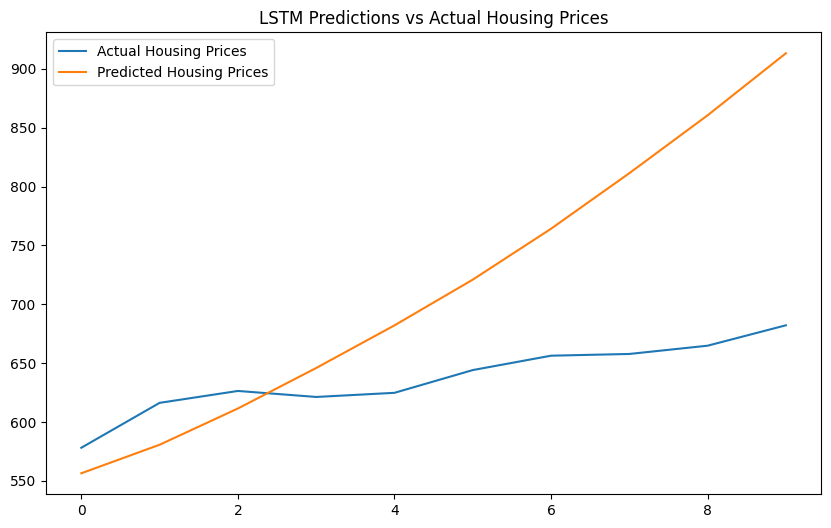

In [8]:
df_housing = pd.read_csv('dataSources/USSTHPI_API_DATA.csv')
df_housing['DATE'] = pd.to_datetime(df_housing['DATE'])
df_housing = df_housing.sort_values('DATE')

scaler_housing = MinMaxScaler()
df_housing['Price_scaled'] = scaler_housing.fit_transform(df_housing[['USSTHPI']])

data_housing = df_housing['Price_scaled'].values
X_housing, y_housing = create_sequences(data_housing, seq_length)

train_size_housing = int(len(X_housing) * 0.8)
X_train_housing, X_test_housing = X_housing[:train_size_housing], X_housing[train_size_housing:]
y_train_housing, y_test_housing = y_housing[:train_size_housing], y_housing[train_size_housing:]
X_train_housing = X_train_housing.reshape((X_train_housing.shape[0], X_train_housing.shape[1], 1))
X_test_housing = X_test_housing.reshape((X_test_housing.shape[0], X_test_housing.shape[1], 1))

model_housing = Sequential([LSTM(50, activation='relu', input_shape=(seq_length, 1)), Dense(1)])
model_housing.compile(optimizer='adam', loss='mse')
model_housing.fit(X_train_housing, y_train_housing, epochs=50, batch_size=32, validation_data=(X_test_housing, y_test_housing))

predictions_housing = model_housing.predict(X_test_housing)
predictions_rescaled_housing = scaler_housing.inverse_transform(predictions_housing.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(df_housing['USSTHPI'][-len(predictions_housing):].values, label='Actual Housing Prices')
plt.plot(predictions_rescaled_housing, label='Predicted Housing Prices')
plt.legend()
plt.title('LSTM Predictions vs Actual Housing Prices')
plt.show()


For housing the model over predicts the rate of increase, though it does follow the trend once again, as the true data does only show increase, just not as fast as the model predicts.

# 8. Final Visualization

This visualiztion will aim to answer the questions posed at the beginning of project. I will achieve this through the 
creation of a visualization containing the rate of change for all of the datasets.

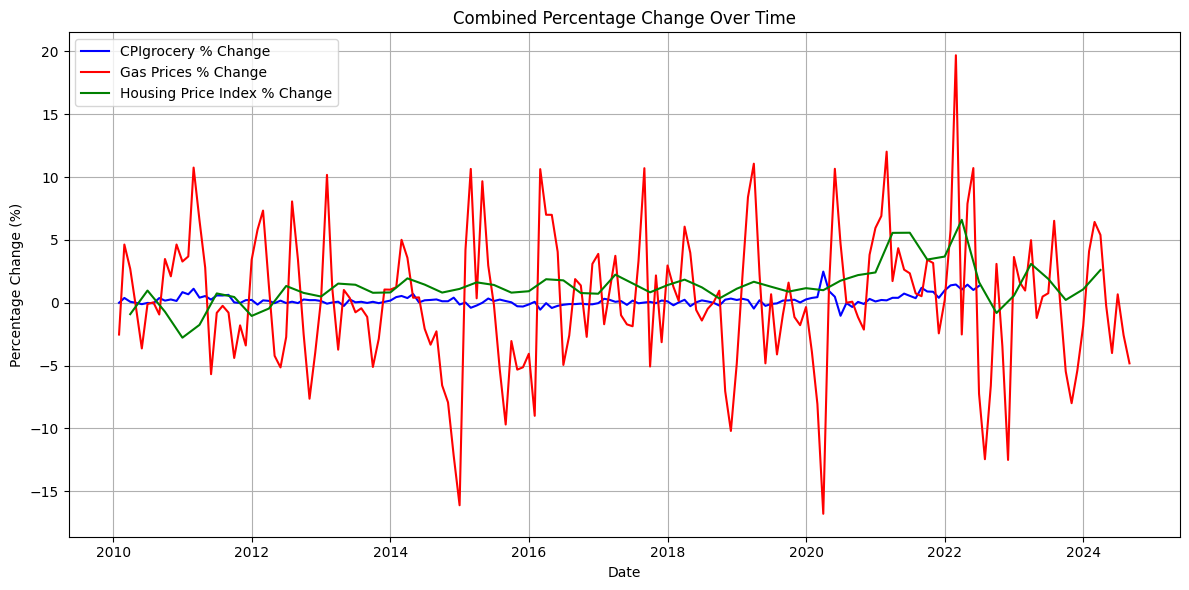

In [10]:
df_grocery['pct_change'] = df_grocery['CPI'].pct_change() * 100
df_gas['pct_change'] = df_gas['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'].pct_change() * 100
df_housing['pct_change'] = df_housing['USSTHPI'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(df_grocery['DATE'], df_grocery['pct_change'], label='CPIgrocery % Change', color='blue')
plt.plot(df_gas['Date'], df_gas['pct_change'], label='Gas Prices % Change', color='red')
plt.plot(df_housing['DATE'], df_housing['pct_change'], label='Housing Price Index % Change', color='green')
plt.title('Combined Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based off of the above visualization display the percentage change for each necessity category since the recession, here are my project questions and answers.

1. Which necessity category has the highest inflation between groceries, gas, and housing since the great recession? 
    Overall, I would say it is definitely housing as accross the chart the green line (housing) is almost always above the y=0 meaning it is almost always inflating in values. 

2. Which necessity category has the lowest inflation? 
    I would say, based off of the above visualization, the necessity category with the lowest inflation rate is groceries. This is due to the fact that it generally stays on the y=0 or goes slightly above or below, just barely going positive a but more than negative, indicating a slow inflation rate, in comparison to the other two.
3. What time period saw the most inflation for each category?

    3a. Grocery - for grocery, the highest inflationary rate is indicated from 2020 to 2022 as there is a large spike from Covid in 2020, and it continues to trend positive (above y=0) after that point. This indicates the most inflation in that necessity category accross the whole visualization.

    3b. Gas - for gas, it is hard to tell due to the volatile rate of change which gas has, though I would say it is clear that gas experienced the most inflation between 2021 and 2023. This is clear by the largest spike, which towers over the rest in 2022, which charecterized this time periods rapid inflation as Covid restrictions were loosened and the need for gas was on the rise again.

    3c. Housing - for housing, unfortunately I would say from 2020 to present is the highest inflationary rate seen since the recession, as during this time period the data stays almost 100% above y=0 displaying a peristent and constant infaltionary change. 

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [2]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 18333 bytes to source.py
